<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation-Practice" data-toc-modified-id="Backpropagation-Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation Practice</a></span><ul class="toc-item"><li><span><a href="#Data-Science-Unit-4-Sprint-2-Assignment-2" data-toc-modified-id="Data-Science-Unit-4-Sprint-2-Assignment-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Data Science Unit 4 Sprint 2 Assignment 2</em></a></span></li><li><span><a href="#Try-building/training-a-more-complex-MLP-on-a-bigger-dataset." data-toc-modified-id="Try-building/training-a-more-complex-MLP-on-a-bigger-dataset.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Try building/training a more complex MLP on a bigger dataset.</a></span></li><li><span><a href="#Stretch-Goals:" data-toc-modified-id="Stretch-Goals:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stretch Goals:</a></span></li></ul></li></ul></div>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
# Set data as arrays

import numpy as np

X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
])

y = np.array([
    [0],
    [1],
    [1],
    [1],
    [1],
    [0],
    [0]
])

In [2]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

# create neural network class.
class NeuralNetwork:
  # __init__ function.
    def __init__(self):
        # set up architecture of neural network.
        
        # set input nodes.
        self.inputs = 3
        # set hidden nodes.
        self.hiddenNodes = 4
        # set output nodes.
        self.outputNodes = 1

        # create initial weights.
        # 2x3 matrix array for the first Layer.
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
        
        # 3x1 matrix array for hidden to output.
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    # create sigmoid function.    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    # create sigmoidprime function.
    def sigmoidPrime(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    # create feedforward function.
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        # weighted sum of inputs => hidden layer.
        self.hidden_sum = np.dot(X, self.weights1)
        # activations of weighted sum.
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # weight sum between hidden and output.
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        # final activation of output.
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

    # create backward pass function.    
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        # error in output.
        self.o_error = y - o 
        
        # apply derivative of sigmoid to error.
        # how far off are we in relation to the Sigmoid f(x) of the output.
        # ^- aka hidden => output.
        self.o_delta = self.o_error * self.sigmoidPrime(o) # scale by sigmoidprime derivative.
        
        # z2 error.
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # how much of that "far off" can explained by the input => hidden.
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # adjustment to first set of weights (input => hidden).
        self.weights1 = self.weights1 + X.T.dot(self.z2_delta)
        
        # adjustment to second set of weights (hidden => output).
        self.weights2 = self.weights2 + self.activated_hidden.T.dot(self.o_delta)
        
  # create train function, performs 1 epoch of the training process.
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [3]:
# set the neuralnetwork class.
nn = NeuralNetwork()

# for loop for number of epochs / iterations, #10000 times.
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
        
    # train the nueralnetwork class on X,y data.
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.65108862]
 [0.66221205]
 [0.67598   ]
 [0.65219666]
 [0.66548401]
 [0.68583058]
 [0.63966239]]
Loss: 
 0.2507722442174635
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.59941691]
 [0.60326575]
 [0.61958545]
 [0.60302317]
 [0.61937764]
 [0.62334202]
 [0.5997161 ]]
Loss: 
 0.24458465460904905
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.57903837]
 [0.58053674]
 [0.59771131]
 [0.58484127]
 [0.60230094]
 [0.59944358]
 [0.58465737]]
Loss: 
 0.2435356000077249
+---------EPOCH 4---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [4]:
# imports.
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
# input the given image dimensions.
img_rows, img_cols = 28, 28

In [7]:
# split data between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# show all dataframe shapes.
print('x train:', x_train.shape)
print('y train:', y_train.shape)
print('x test:', x_test.shape)
print('y test:', y_test.shape)

x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
y test: (10000,)


In [11]:
# reshape the x_train data by dimensions.
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
# reshape the x_test data by dimensions.
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# normalize the data sets.
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# check its in correct format.
x_train.shape

(60000, 784)

### This is where I hit a brick wall. It felt like writers block but with code. I began to search for tutorials via google and found a repo with this exact assignment used in a short tutorial at the University of Toronto. There will be a multitude of notes throughout to guarantee understanding of how and why this code was used.

### The code below is a replication of the repo which can be found at:

https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

In [1]:
%matplotlib inline

In [3]:
# Fresh import of prerequisite tools 

import matplotlib.pyplot as plt
# make the figures a bit bigger
plt.rcParams['figure.figsize'] = (7,7)
import numpy as np

from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [19]:
'''I already loaded the data above and shuffled/split it between training and test sets
but it has no real context as a stand alone so I did it again here. With an output of the 
dataframe shapes'''

# Amount of input nodes?
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


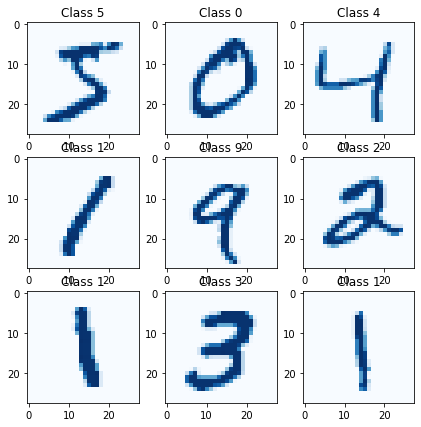

In [20]:
# This is a for loop that visualizes the training data for the first 9 entries

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='Blues', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [21]:
''' I also began to format the data above but did not complete it. This code
reshapes the data input (28x28 images) into a vector with 784 dimensions (pixels) and
scales it to in the range of 0 to 1 versus 0 to 255'''

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('Training matrix shape', X_train.shape)
print('Test matrix shape', X_test.shape)

Training matrix shape (60000, 784)
Test matrix shape (10000, 784)


### This ^^^ is where I experienced my blocker. Everything beyond this is code reused from the afforementioned github repo.

In [23]:
# The next step is to modify the matrixes using one-hot encoding

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [28]:
# The following code builds a simple 3 layer fully connected network

# Choose the keras model you want to use
model = Sequential()
# This adds a hidden layer of 512 nodes and the input shape
model.add(Dense(512, input_shape=(784,)))
# This uses the relu activation function on the output of the layer
# above and takes all neg values to be 0
model.add(Activation('relu'))
# Dropout works by randomly setting the outgoing edges
# of hidden units (neurons that make up hidden layers) to 0
# at each update of the training phase. It helps to protect the model
# from overfitting.
model.add(Dropout(0.2))

### I'm not sure why these were duplicated 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# The "softmax" activation, ensures the output is a valid probaility
# distribution, its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [35]:
# When compiing a model, Keras asks you to specify your loss function and your optimizer.
# The loss function we use here is called categorical crossentropy, it is a loss function
# well-suited to comparing two probability distributions
# The optimizer helps determine how quickly the model learns, how resistent it is to 
# getting "stuck" or "blowing up", "adam" is often a good choice (developed at U of T).

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Now we feed the training data loaded earlier into the model(aka train the model)
# Our goal is for the model to learn to classify digits.
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 122us/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0756 - val_accuracy: 0.9813
Epoch 2/4
60000/60000 [==============================] - 7s 119us/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0743 - val_accuracy: 0.9821
Epoch 3/4
60000/60000 [==============================] - 7s 123us/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0918 - val_accuracy: 0.9786
Epoch 4/4
60000/60000 [==============================] - 8s 127us/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0730 - val_accuracy: 0.9824


In [39]:
# Evaluate the models performance

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.07297395240982914
Test accuracy: 0.9824000000953674



### Inspecting the output
It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [41]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

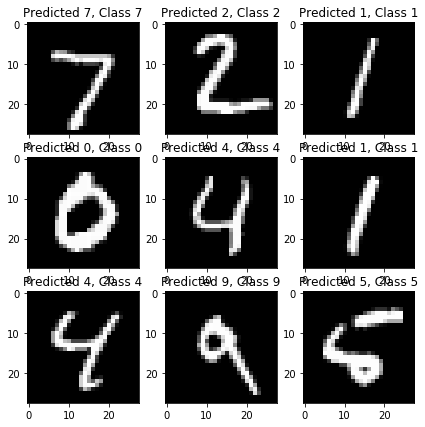

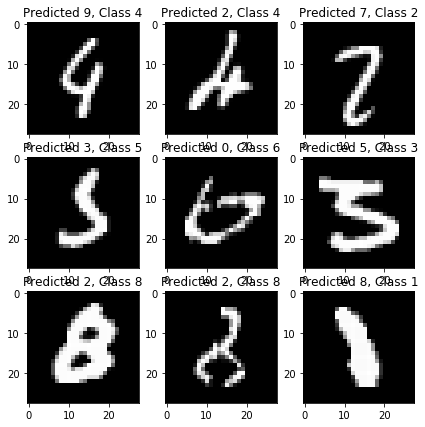

In [42]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?

# Bonus Questions Chris Shared with us:

1. Investigate the various loss functions. Which is best suited for the task at hand (predicting 1 / 0) and why?
2. What is the difference between a loss function and a metric? Why might we need both in Keras?
3. Investigate the various optimizers. Stochastic Gradient Descent (sgd) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as adam have to offer?

### Answers

1.

2.

3.